Multi-class Classification on Consumer Complaints of Financial Instituation


In [2]:
import os
# print(os.listdir("C://Users//navin//Dropbox//Ryerson University//CIND 820//complaints"))

import pandas as pd
import numpy as np
import zipfile
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


from IPython.display import display

#import warnings

In [3]:
df = pd.read_csv('complaints.csv')

df.shape 

(1757764, 18)

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date received,2019-05-28,2019-09-24,2019-09-19,2019-11-08,2019-05-03,2015-08-01,2019-07-26,2019-07-08,2019-10-24,2019-11-20
Product,"Credit reporting, credit repair services, or o...",Debt collection,"Credit reporting, credit repair services, or o...",Debt collection,"Credit reporting, credit repair services, or o...",Debt collection,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Credit card or prepaid card
Sub-product,Credit reporting,I do not know,Credit reporting,I do not know,Credit reporting,Payday loan,Credit reporting,Credit reporting,Credit reporting,General-purpose credit card or charge card
Issue,Problem with a credit reporting company's inve...,Attempts to collect debt not owed,Incorrect information on your report,Communication tactics,Incorrect information on your report,Taking/threatening an illegal action,Problem with a credit reporting company's inve...,Problem with a credit reporting company's inve...,Incorrect information on your report,Closing your account
Sub-issue,Their investigation did not fix an error on yo...,Debt is not yours,Information belongs to someone else,Frequent or repeated calls,Account information incorrect,Sued w/o proper notification of suit,Their investigation did not fix an error on yo...,Their investigation did not fix an error on yo...,Information belongs to someone else,Company closed your account
Consumer complaint narrative,Although I am checking for and addressing miss...,transworld systems inc. \nis trying to collect...,NaN,"Over the past 2 weeks, I have been receiving e...",NaN,Quickclickloans.com hired an attorney XXXX XXX...,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",Hello This complaint is against the three cred...,NaN,NaN
Company public response,NaN,NaN,Company has responded to the consumer and the ...,NaN,Company has responded to the consumer and the ...,Company believes it acted appropriately as aut...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...,Company has responded to the consumer and the ...
Company,"EQUIFAX, INC.",TRANSWORLD SYSTEMS INC,Experian Information Solutions Inc.,"Diversified Consultants, Inc.","TRANSUNION INTERMEDIATE HOLDINGS, INC.","QuickClick Loans of Illinois, LLC",Experian Information Solutions Inc.,"TRANSUNION INTERMEDIATE HOLDINGS, INC.","TRANSUNION INTERMEDIATE HOLDINGS, INC.",PENTAGON FEDERAL CREDIT UNION
State,GA,FL,PA,NC,OK,CA,CA,NY,CA,VA
ZIP code,310XX,335XX,15206,275XX,735XX,951XX,914XX,109XX,925XX,22304


In [5]:
df.dtypes


Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
pd.DataFrame(df.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Debt collection'],
       ['Credit card or prepaid card'],
       ['Payday loan, title loan, or personal loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Vehicle loan or lease'],
       ['Student loan'],
       ['Mortgage'],
       ['Checking or savings account'],
       ['Credit card'],
       ['Consumer Loan'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Payday loan'],
       ['Other financial service'],
       ['Prepaid card'],
       ['Money transfers'],
       ['Virtual currency']], dtype=object)

In [7]:
df2=df.groupby('Product').apply(lambda x: x['Sub-product'].unique())
df2.shape
df2['Student loan']

array(['Non-federal student loan', 'Private student loan',
       'Federal student loan servicing'], dtype=object)

In [8]:
pd.DataFrame(df['Submitted via'].unique()).values

array([['Web'],
       ['Referral'],
       ['Fax'],
       ['Postal mail'],
       ['Phone'],
       ['Email']], dtype=object)

In [9]:
pd.DataFrame(df['Company response to consumer'].unique()).values

array([['Closed with explanation'],
       ['Closed with non-monetary relief'],
       ['Untimely response'],
       ['Closed with monetary relief'],
       ['Closed'],
       ['Closed with relief'],
       ['In progress'],
       ['Closed without relief'],
       [nan]], dtype=object)

In [10]:
pd.DataFrame(df['Timely response?'].unique()).values

array([['Yes'],
       ['No']], dtype=object)

In [11]:
pd.DataFrame(df['Consumer disputed?'].unique()).values

array([[nan],
       ['No'],
       ['Yes']], dtype=object)

In [12]:
pd.DataFrame(df['Tags'].unique()).values

array([[nan],
       ['Servicemember'],
       ['Older American'],
       ['Older American, Servicemember']], dtype=object)

Gererate New dataset contaning Product and Consumer complaint narrative

In [13]:
dfNew = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
dfNew = dfNew[pd.notnull(dfNew['Consumer complaint narrative'])]

# Renaming second column for a simpler name
dfNew.columns = ['Product', 'Consumer_complaint'] 

dfNew.shape

(596333, 2)

In [14]:
dfNew.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other reports', 
              'Credit reporting': 'Credit reporting, repair, or other reports',
              'Credit card': 'Credit card or prepaid card',
              'Prepaid card': 'Credit card or prepaid card',
              'Payday loan': 'Payday loan, title loan, or personal loan',
              'Money transfers': 'Money transfer, virtual currency, or money service',
              'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [15]:
pd.DataFrame(dfNew.Product.unique()).values

array([['Credit reporting, repair, or other reports'],
       ['Debt collection'],
       ['Payday loan, title loan, or personal loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Student loan'],
       ['Mortgage'],
       ['Checking or savings account'],
       ['Vehicle loan or lease'],
       ['Credit card or prepaid card'],
       ['Consumer Loan'],
       ['Bank account or service'],
       ['Other financial service']], dtype=object)

Distribuation of Product Attribute

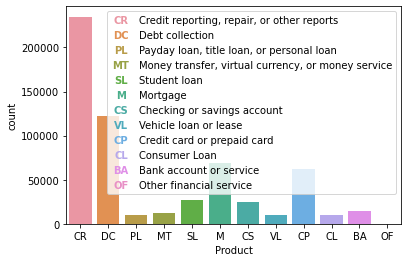

In [16]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


dfNew1=dfNew.replace({'Product': 
             {
              'Credit reporting, repair, or other reports':'CR',
              'Debt collection':'DC',
              'Payday loan, title loan, or personal loan':'PL',
              'Money transfer, virtual currency, or money service':'MT', 
              'Student loan':'SL', 
              'Mortgage': 'M',
              'Checking or savings account':'CS', 
              'Vehicle loan or lease':'VL',
              'Credit card or prepaid card':'CP',
              'Consumer Loan':'CL',
              'Bank account or service':'BA',
              'Other financial service':'OF'}},inplace= False)


fig, ax1 = plt.subplots()
        
sns.countplot(x = dfNew1.Product, ax=ax1)
handltext = ["CR", "DC", "PL", "MT", "SL", "M", "CS", "VL", "CP", "CL", "BA","OF"]
labels = ["Credit reporting, repair, or other reports", 
          "Debt collection", 
          "Payday loan, title loan, or personal loan",
          "Money transfer, virtual currency, or money service", 
          "Student loan", 
          "Mortgage",
          "Checking or savings account", 
          "Vehicle loan or lease",
          "Credit card or prepaid card",
          "Consumer Loan",
          "Bank account or service",
          "Other financial service"]
         

t = ax1.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax1.patches)]

ax1.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()
fig.savefig('sample1.png',bbox_inches='tight')


In [17]:
# making new dataframe for more analyzing
dfNewAn=df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other reports', 
              'Credit reporting': 'Credit reporting, repair, or other reports',
              'Credit card': 'Credit card or prepaid card',
              'Prepaid card': 'Credit card or prepaid card',
              'Payday loan': 'Payday loan, title loan, or personal loan',
              'Money transfers': 'Money transfer, virtual currency, or money service',
              'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= False)

Crosstab of Product and Consumer disputed attributes

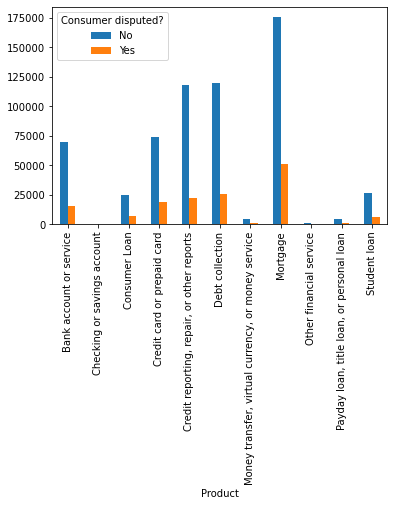

In [18]:
pd.crosstab(dfNewAn['Product'],dfNewAn['Consumer disputed?']).plot(kind='bar')
plt.savefig('crosstab.png')

Timley Response Distribution

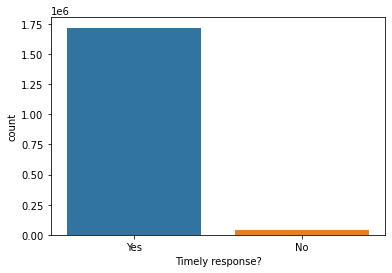

In [19]:
sns.countplot(x='Timely response?',data=dfNewAn)
plt.savefig('sample3.png')